# K-Nearest Neighbors (K-NN)

<img src="nearestNeighbors.png" alt="Nearest Neighbors to Element" style="width: 700px;"/>

K-Nearest Neighbors is an algorithm which classifies an element based on those surrounding it. It determines the K closest element using a distance algorithm, the most common one being the __Euclidean Distance__ algorithm:

$$\LARGE{Distance = \sqrt{(x_2 - x_1)^2 + (x_2 - x_1)^2}}$$

__Where:__ $P_1(x_1, y_1)$ and $P_2(x_2, y_2)$

The element then classified as the type that is most commonly surrounding it. In the image shown above, there are three neighbors part of category 1 and two neighbors part of category 2. As a result, the new element is part of category 1. The neighbors picked in the image are the 5 closest existing elements in relation to the position of the new element.

<hr>

## Code

__Setting up the Dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Advertisements.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<hr>

__Fitting the Classifier & Making Predictions:__

In [6]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

VERTICAL_ALIGNMENT = 1;
np.concatenate((
    y_pred.reshape(len(y_pred), VERTICAL_ALIGNMENT),
    y_test.reshape(len(y_pred), VERTICAL_ALIGNMENT)
    ), VERTICAL_ALIGNMENT)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

<hr>

__Creating the Confusion Matrix:__

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[64  4]
 [ 3 29]]
0.93


<hr>

__Visualizing Training Results:__

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


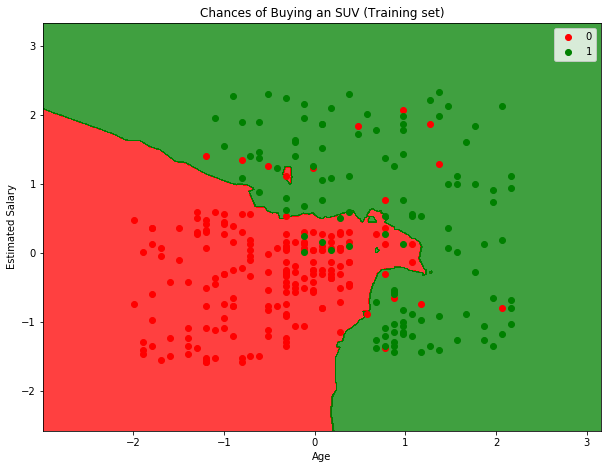

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


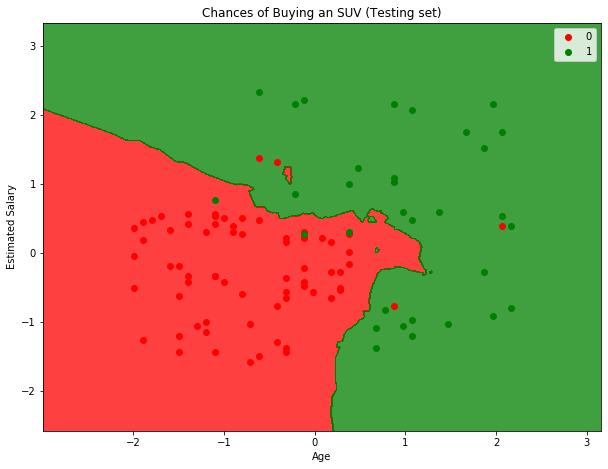

In [5]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

#Classification Visualizer function:
def display(X_set, y_set, type):
    from matplotlib.colors import ListedColormap
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for index, value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == value, 0], X_set[y_set == value, 1],
                    c = ListedColormap(('red', 'green'))(index), label = value)
        
    plt.title('Chances of Buying an SUV (' + type + ' set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#Displaying the results for the training and test sets.
display(X_train, y_train, 'Training')
display(X_test, y_test, 'Testing')

__Results:__
<br>
Because the K-NN algorithm estimates the type of a datapoint based on its nearest neighbors, there is no consistent trend being followed. The line's abnormality scales directly with the variance of the dataset. 